# SMS Spam Detection

In [1]:
import numpy as np
import pandas as pd

In [2]:
msg = pd.read_csv(r"C:\Personal\DS-Py\Project\Spam sms Prediction\spam.csv",encoding='latin1')
msg.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
msg.shape

(5572, 5)

In [4]:
# 1. data cleaning
# 2. eda
# 3. text preprocessing
# 4. model building
# 5. evaluation
# 6. Improvement
# 7. Deployment

## 1. Data cleaning

In [5]:
msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
msg = msg.iloc[:,0:2]
msg.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# renaming col name
new_col_name = {'v1':'target','v2':'text'}
msg.rename(columns=new_col_name,inplace=True)

In [8]:
msg.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
msg['target'] = encoder.fit_transform(msg['target']) # ham = 0, spam = 1

In [11]:
msg.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
msg.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicates
msg.duplicated().sum()

403

In [14]:
msg = msg.drop_duplicates(keep='first')

In [15]:
msg.shape

(5169, 2)

## 2. EDA

In [16]:
msg['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

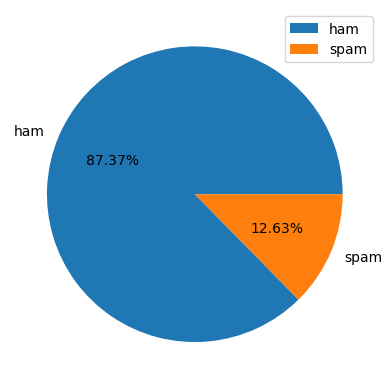

In [17]:
import matplotlib.pyplot as plt
plt.pie(msg['target'].value_counts(),labels = ['ham', 'spam'], autopct = "%.2f%%")
plt.legend()

In [18]:
# data is imbalanced

In [19]:
msg['num_char'] = msg['text'].apply(len) #number of characters

In [20]:
import nltk
from nltk import word_tokenize

In [21]:
def func(message):
    lis = nltk.word_tokenize(message)
    return len(lis)
msg['num_words'] = msg['text'].apply(func) #number of words

In [22]:
def func1(message):
    lis = nltk.sent_tokenize(message)
    return len(lis)
msg['num_sentences'] = msg['text'].apply(func1)

In [23]:
msg.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
msg.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [25]:
msg[msg['target']==1].describe() # analysing spam

,target,num_char,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


In [26]:
msg[msg['target']==0].describe() # analysing ham

,target,num_char,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


<AxesSubplot:xlabel='num_char', ylabel='Count'>

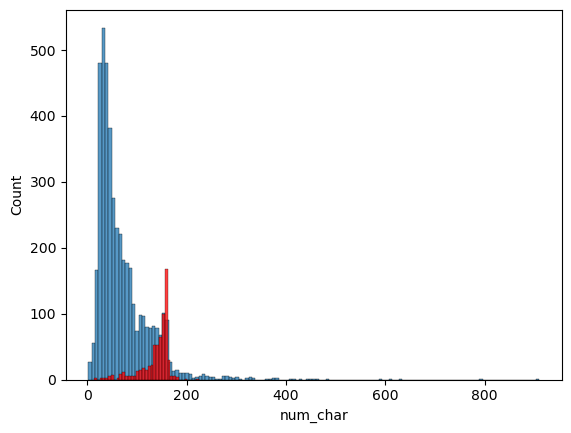

In [27]:
import seaborn as sns
sns.histplot(msg[msg['target']==0]['num_char'])
sns.histplot(msg[msg['target']==1]['num_char'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

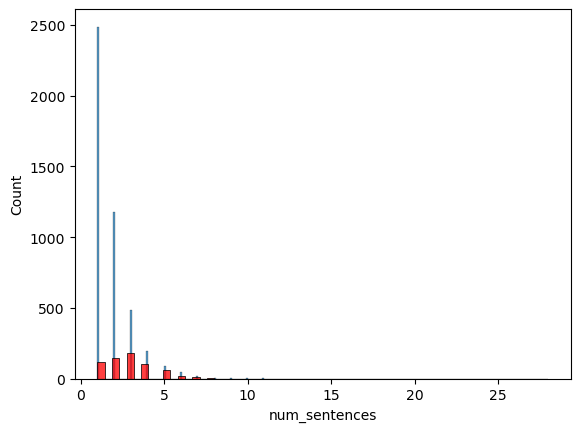

In [28]:
sns.histplot(msg[msg['target']==0]['num_sentences'])
sns.histplot(msg[msg['target']==1]['num_sentences'],color='red')

In [29]:
msg[['num_char','num_words','num_sentences']].corr()

,num_char,num_words,num_sentences
num_char,1.000000,0.965770,0.638143
num_words,0.965770,1.000000,0.684541
num_sentences,0.638143,0.684541,1.000000


In [30]:
# num_char and num_words has high coorelation => multicollinearity

## 3. Data Preprocessing

In [31]:
# lowercase
# tokenization
# removing special characters
# removing stop words and punctuation
# stemming

In [32]:
import nltk
from nltk import word_tokenize
import string, re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
port_stemmer = PorterStemmer()
lan_stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [34]:
# Create a function to generate cleaned data from raw text
def clean_text(text):
    text = word_tokenize(text)  # Create tokens
    text = " ".join(text)  # Join tokens
    text = [char for char in text if char not in string.punctuation]  # Remove punctuations
    text = ''.join(text)  # Join the letters
    text = [char for char in text if char not in re.findall(r"[0-9]", text)]  # Remove Numbers
    text = ''.join(text)  # Join the letters
    text = [word.lower() for word in text.split() if word.lower() not in set(stopwords.words('english'))] # Remove common English words (I, you, we,...)
    text = ' '.join(text)  # Join the letters
    # text = list(map(lambda x: lan_stemmer.stem(x), text.split()))
    text = list(map(lambda x: port_stemmer.stem(x), text.split()))
    # text = list(map(lambda x: lemmatizer.lemmatize(x), text.split()))
    return " ".join(text)  # error word

# Apply the clean_text function to create a new column 'Clean Email'
msg['Clean Text'] = msg['text'].apply(clean_text)

In [35]:
msg.head()

,target,text,num_char,num_words,num_sentences,Clean Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though


In [36]:
msg.columns

Index(['target', 'text', 'num_char', 'num_words', 'num_sentences',
       'Clean Text'],
      dtype='object')

In [37]:
!pip install wordcloud

In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

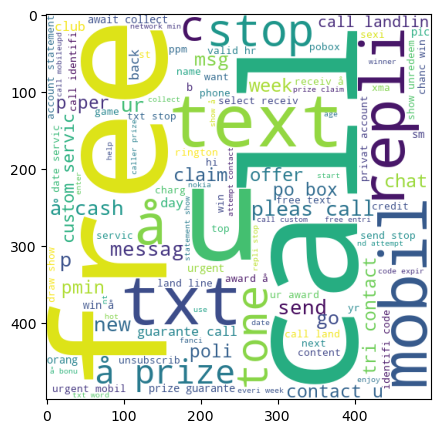

In [39]:
spam = wc.generate(msg[msg['target']==1]['Clean Text'].str.cat(sep=" "))
plt.figure(figsize = (10,5))
plt.imshow(spam)

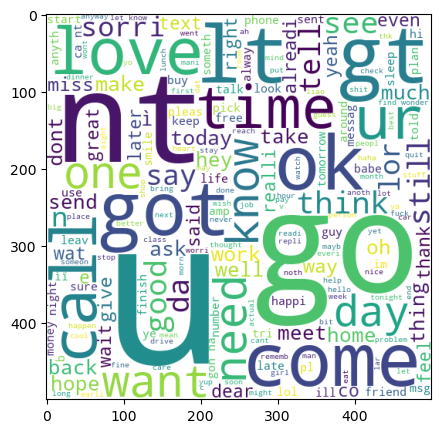

In [40]:
ham = wc.generate(msg[msg['target']==0]['Clean Text'].str.cat(sep=" "))
plt.figure(figsize = (10,5))
plt.imshow(ham)

In [41]:
msg[msg['target']==1]['Clean Text'].tolist()

['free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send å£ rcv',
 'winner valu network custom select receivea å£ prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'six chanc win cash pound txt csh send cost pday day tsandc appli repli hl info',
 'urgent week free membership å£ prize jackpot txt word claim c wwwdbuknet lccltd pobox ldnwarw',
 'xxxmobilemovieclub use credit click wap link next txt messag click http wap xxxmobilemovieclubcom nqjkgighjjgcbl',
 'england v macedonia dont miss goalsteam news txt ur nation team eg england tri wale scotland txtì¼ poboxoxwwq',
 'thank subscript rington uk mobil charg å£month pleas confirm repli ye repli charg',
 'rodger burn msg tri call repli sm free nokia mobil free camcord pleas call deliveri tomorrow',
 'sm ac sptv new jersey devil d

In [42]:
spam_corpus = []
for ms in msg[msg['target']==1]['Clean Text'].tolist():
    for word in ms.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9529

In [44]:
from collections import Counter
df1 = pd.DataFrame(Counter(spam_corpus).most_common(30))
df1.rename(columns={0:'Word',1:'Frequency'},inplace=True)
df1

,Word,Frequency
0,call,323
1,å£,223
2,free,192
3,u,142
4,txt,141
5,text,123
6,ur,119
7,mobil,115
8,stop,109
9,repli,104


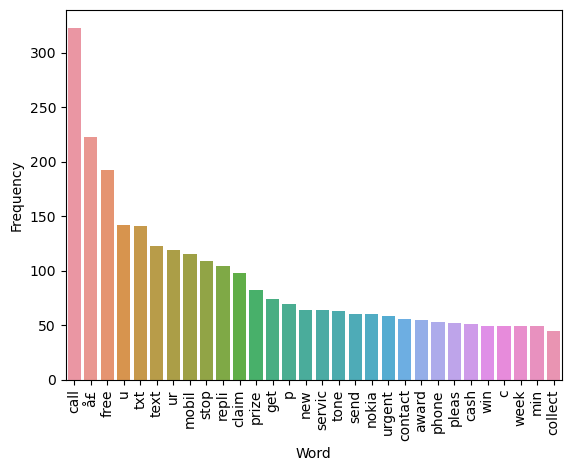

In [45]:
sns.barplot(x = df1['Word'],y = df1['Frequency'])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [47]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [48]:
x = msg['Clean Text'].values
y = msg['target'].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [51]:
x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()

In [52]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print("ACCURACY SCORE")
print("Gaussian: ",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print('\n')
print("Multinomial : ",accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print('\n')
print("Bernoulli : ",accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

ACCURACY SCORE
Gaussian:  0.8413926499032882
[[759 137]
 [ 27 111]]
0.4475806451612903


Multinomial :  0.971953578336557
[[896   0]
 [ 29 109]]
1.0


Bernoulli :  0.9796905222437138
[[896   0]
 [ 21 117]]
1.0


In [55]:
# here the dataset is imbalanced
# so precision score matters a lot
# so we will go with tfidf -> Bernoulli (bnb) 

In [56]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

# tfidf , mnb

In [57]:
tf_idf = pickle.load(open(r"C:\Users\sanme\Downloads\vectorizer.pkl", 'rb'))
models = pickle.load(open(r"C:\Users\sanme\Downloads\model.pkl", 'rb'))

In [58]:
sms = "Click on this link [Link] below to claim your refund."

In [59]:
# 1. Preprocess
transformed_sms = clean_text(sms)

# 2. Vectorize
vect_input = tf_idf.transform([transformed_sms])

# 3. Predict
result = models.predict(vect_input)[0]

# 4. Display
if result == 1:
  print("Spam")
else:
  print("Not Spam")

Spam


In [60]:
# Lets try with other models

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [62]:
models = []
models.append(('Logistic Regression', LogisticRegression()) )
models.append(('Naive bayes', MultinomialNB()))
models.append(('Support Vector Machine', SVC()))

In [63]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score, log_loss

In [64]:
Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
for name, model in models:

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    Model.append(name)
    Accuracy.append(round(accuracy_score(y_test, y_pred), 4) * 100)
    Precision.append(round(precision_score(y_test, y_pred), 4) * 100)
    Recall.append(round(recall_score(y_test, y_pred), 4) * 100)
    F1.append(round(f1_score(y_test, y_pred), 4) * 100)

df = pd.DataFrame({'Model': Model, 'Accuracy':Accuracy, 'Precision':Precision, 'Recall':Recall, 'F1 Score':F1})

In [65]:
df = df.sort_values(by = 'Precision', ascending = False).reset_index(drop = True)
df

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive bayes,97.20,100.00,78.99,88.26
1,Support Vector Machine,97.20,97.39,81.16,88.54
2,Logistic Regression,96.13,96.23,73.91,83.61


In [66]:
df = df.sort_values(by = 'F1 Score', ascending = False).reset_index(drop = True)
df

,Model,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machine,97.20,97.39,81.16,88.54
1,Naive bayes,97.20,100.00,78.99,88.26
2,Logistic Regression,96.13,96.23,73.91,83.61


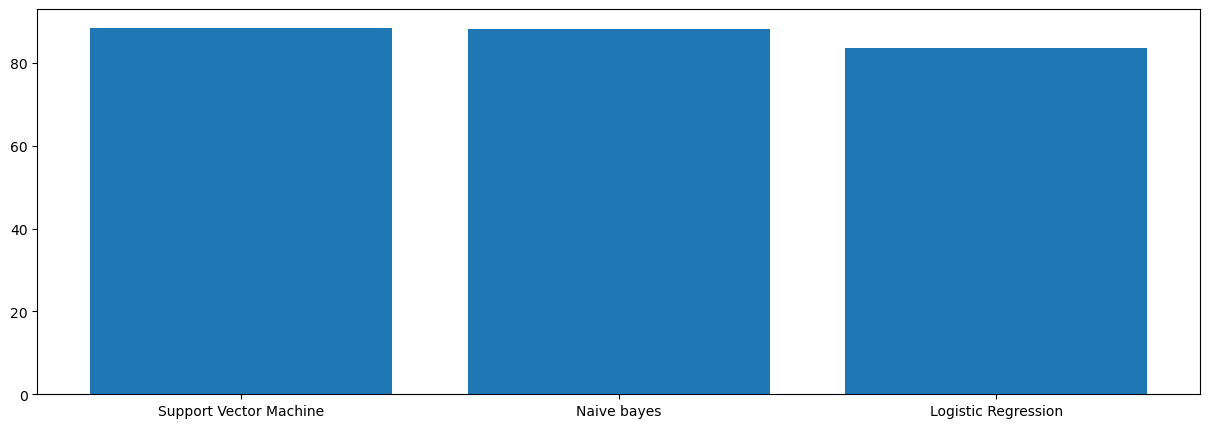

In [67]:
plt.figure(figsize = (15,5))
plt.bar(df['Model'],df['F1 Score']);

In [68]:
# In summary:

# 1) The SVM model has high accuracy and precision, but its recall is comparatively lower.
# 2) The Naive Bayes model has perfect precision but a slightly lower recall.
# 3) The Logistic Regression model has a balance between precision and recall.